# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


643

In [3]:
#sets up url and unit for temperature
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

query_url = f'{url}appid={api_key}&units={units}&q='


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info
city_name = []
cloudness=[]
country = []
date = []
humidity=[]
lat = []
lng = []
max_temp = []
wind_speed = []

print(f'Beginning Data Retrieval')
print('----------------------------------')
record = 1
set_num = 1

#used to loop through cities and collect responses from json file
for city in cities:
    
    try:
        response = requests.get(query_url+city).json()
        city_name.append(response['name'])        
        cloudness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        #records name of city as it is being processed
        city_record = response['name']                
        print(f'Processing Record {record} of set {set_num}|{city_record}')
        
        record = record + 1 
        
        #resets record number after reaching 50 and adds 1 to the next set
        if record > 50:
            set_num = set_num + 1
            record = 1
            
    #skips the name of city if there's no match        
    except:

        print("City not found. Skipping...")
        
    continue
    
print('-----------------------------')
print(f'End of Data Retrieval') 


Beginning Data Retrieval
----------------------------------
Processing Record 1 of set 1|Laguna
Processing Record 2 of set 1|Nizhneangarsk
Processing Record 3 of set 1|Sironj
Processing Record 4 of set 1|Areka
Processing Record 5 of set 1|Boden
Processing Record 6 of set 1|Jamestown
Processing Record 7 of set 1|Rikitea
Processing Record 8 of set 1|Karratha
City not found. Skipping...
Processing Record 9 of set 1|Warrington
Processing Record 10 of set 1|Severo-Kurilsk
Processing Record 11 of set 1|Yar-Sale
Processing Record 12 of set 1|Port Alfred
Processing Record 13 of set 1|Mataura
Processing Record 14 of set 1|Butaritari
Processing Record 15 of set 1|Hithadhoo
Processing Record 16 of set 1|Paralia
Processing Record 17 of set 1|Grand-Bourg
Processing Record 18 of set 1|Guerrero Negro
Processing Record 19 of set 1|Iqaluit
Processing Record 20 of set 1|New Norfolk
Processing Record 21 of set 1|Nanortalik
Processing Record 22 of set 1|Bathsheba
Processing Record 23 of set 1|Jeremoabo
Pr

Processing Record 45 of set 4|Caravelas
Processing Record 46 of set 4|Tambo
Processing Record 47 of set 4|Waingapu
Processing Record 48 of set 4|Nago
Processing Record 49 of set 4|Kahului
Processing Record 50 of set 4|Paramonga
Processing Record 1 of set 5|Kodiak
City not found. Skipping...
Processing Record 2 of set 5|Domanivka
Processing Record 3 of set 5|Sri Aman
City not found. Skipping...
Processing Record 4 of set 5|Erzin
Processing Record 5 of set 5|Kerouane
Processing Record 6 of set 5|Port Lincoln
Processing Record 7 of set 5|Manakara
Processing Record 8 of set 5|Plettenberg Bay
Processing Record 9 of set 5|Warwick
Processing Record 10 of set 5|Klaksvik
Processing Record 11 of set 5|The Valley
Processing Record 12 of set 5|Tuatapere
Processing Record 13 of set 5|Fuling
Processing Record 14 of set 5|Sovetskiy
City not found. Skipping...
Processing Record 15 of set 5|Resplendor
Processing Record 16 of set 5|Calama
Processing Record 17 of set 5|Sayyan
Processing Record 18 of set 

Processing Record 42 of set 8|Canatlan
Processing Record 43 of set 8|Namatanai
Processing Record 44 of set 8|Ueno
Processing Record 45 of set 8|Kirakira
Processing Record 46 of set 8|Calvia
Processing Record 47 of set 8|Robertsport
Processing Record 48 of set 8|Palana
Processing Record 49 of set 8|Las Matas de Farfan
Processing Record 50 of set 8|Kroya
Processing Record 1 of set 9|Talnakh
Processing Record 2 of set 9|Beyneu
Processing Record 3 of set 9|Lakes Entrance
Processing Record 4 of set 9|Gigmoto
Processing Record 5 of set 9|Palamos
Processing Record 6 of set 9|Palaikastron
Processing Record 7 of set 9|Bellmead
Processing Record 8 of set 9|Westport
Processing Record 9 of set 9|Primero de Enero
Processing Record 10 of set 9|Goderich
Processing Record 11 of set 9|Manta
Processing Record 12 of set 9|Touros
Processing Record 13 of set 9|Ambunti
Processing Record 14 of set 9|Keti Bandar
Processing Record 15 of set 9|Contamana
Processing Record 16 of set 9|Hargeysa
Processing Record 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame
weather_dict = {
    'City':city_name,
    'Cloudness': cloudness,
    'Country': country,
    'Date':date,
    'Humidity':humidity,
    'Latitude':lat,
    'Longitude':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind_speed
}
weather_pd = pd.DataFrame(weather_dict)
weather_pd.head()

,City,Cloudness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Laguna,20,BZ,1562873689,70,16.17,-88.94,89.60,9.17
1,Nizhneangarsk,3,RU,1562873690,69,55.78,109.57,58.71,5.82
2,Sironj,95,IN,1562873690,75,24.10,77.69,79.23,13.51
3,Areka,90,ET,1562873691,90,7.07,37.71,63.39,2.77
4,Boden,0,SE,1562873691,62,65.83,21.69,59.00,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

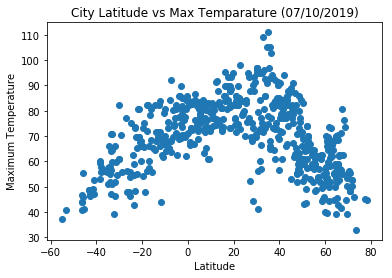

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(x=weather_pd['Latitude'], y=weather_pd['Max Temp'])
plt.title('City Latitude vs Max Temparature (07/10/2019)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.show()
plt.savefig('LatitudevsTemperature.png',dpi=300)

#### Latitude vs. Humidity Plot

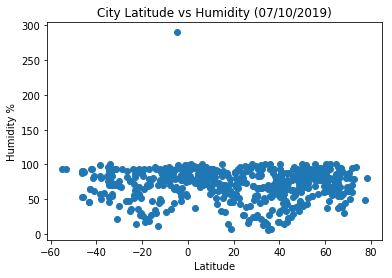

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(x=weather_pd['Latitude'], y=weather_pd['Humidity'])
plt.title('City Latitude vs Humidity (07/10/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()
plt.savefig('LatitudevsHumidity',dpi=300)

#### Latitude vs. Cloudiness Plot

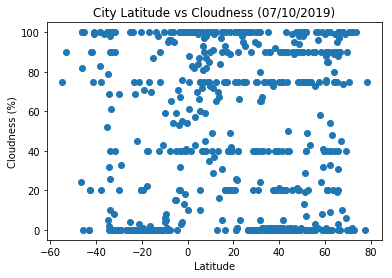

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(x=weather_pd['Latitude'], y=weather_pd['Cloudness'])
plt.title('City Latitude vs Cloudness (07/10/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudness (%)')
plt.show()
plt.savefig('LatitudevsCloudness.png',dpi=300)

#### Latitude vs. Wind Speed Plot

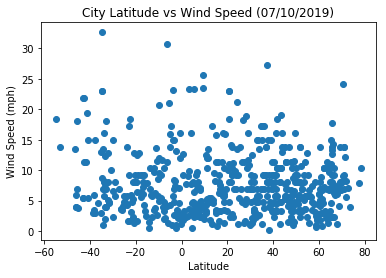

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(x=weather_pd['Latitude'], y=weather_pd['Wind Speed'])
plt.title('City Latitude vs Wind Speed (07/10/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('LatitudevsWindSpeed.png',dpi=300)